<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
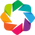

In [1]:
import holoviews as hv
from holoviews import Image, HoloMap, DynamicMap
import numpy as np
from numpy import linalg as LA
from numpy import random, array, linspace
import scipy
from scipy import linalg
from scipy.linalg import hilbert, tri
import copy
hv.extension('bokeh')
# hv.extension('bokeh','matplotlib')
# hv.extension('matplotlib')

In [2]:
# identity matrix

cmap = 'gray_r'
cmap = 'Magma_r'
cmap = 'bgyw_r'
cmap = 'blues'
# colorbar_opts = {'margin':20, 'height':200, 'width':50, 'scale_alpha':100, 'title':'test', 
#                 'padding':50, 'background_fill_color':'pink'}   # how to ruin the colorbar

colorbar_opts = {'padding':20}
options = {'Image': dict(cmap = cmap, colorbar = True, colorbar_opts = colorbar_opts, height = 380, 
                         width = 440, border = 40, xaxis = 'bottom-bare', xticks = 15, xrotation = 300, 
                         sizing_mode = "fixed", yaxis = 'left-bare')}

n = 20
unit_matrix = np.identity(n)
hv_matrix = hv.Image(unit_matrix).options(options)
hv_matrix

:Image   [x,y]   (z)

In [3]:
#hv.help(hv_matrix)

In [4]:
# banded matrix

n = 20
value_diag = 1
band_a = 2

# create banded matrix

def band_matrix_fct(n,value_diag,band_a):
    band_matrix = np.zeros((n,n))
    band_matrix[np.arange(n-1), np.arange(n-1)+1] = np.repeat(band_a,n-1)
    band_matrix[np.arange(n), np.arange(n)] = np.repeat(value_diag,n)
    band_matrix[np.arange(n), np.arange(n)-1] = np.repeat(band_a,n)
    band_matrix[n-1,0] = band_a
    return band_matrix

hv_band_matrix = hv.Image(band_matrix_fct(n,value_diag,band_a)).options(options)
hv_band_matrix

:Image   [x,y]   (z)

In [5]:
hv.help(hv_band_matrix)

Image: Image 

Online example: http://holoviews.org/reference/elements/bokeh/Image.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Image.Image

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	alpha, cmap

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RasterPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

apply_extents                         True                       Boolean        (0, 1)     V RW  
apply_ranges         

In [6]:
LA.cond(band_matrix_fct(n,value_diag,band_a))

21.180339887498995

In [7]:
# banded block matrix


options_divergence = copy.deepcopy(options)
options_divergence['Image']['cmap'] = 'RdBu'
options_divergence['Image']['symmetric'] = True


n = 5
value_diag = 4
band_a = -1
band_block_matrix = np.zeros((n**2,n**2))
for i in range(n):
    band_block_matrix[i*n:(i+1)*n,i*n:(i+1)*n] = band_matrix_fct(n,value_diag,band_a)
    
for i in range(n-1): 
    #print(((i+1)*n,(i+2)*n))
    band_block_matrix[(i+1)*n:(i+2)*n,i*n:(i+1)*n] = -np.identity(n)
    band_block_matrix[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = -np.identity(n)
    
hv_band_block_matrix = hv.Image(band_block_matrix).options(options_divergence).options(symmetric = True)
hv_band_block_matrix    

:Image   [x,y]   (z)

In [8]:
# Why is symmetric not working here?...

In [9]:
hv.help(hv_band_block_matrix)

Image: Image 

Online example: http://holoviews.org/reference/elements/bokeh/Image.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Image.Image

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	alpha, cmap

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RasterPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

apply_extents                         True                       Boolean        (0, 1)     V RW  
apply_ranges         

In [10]:
LA.cond(band_block_matrix)

27.430889899801222

In [11]:
# correlation matrix

corr_band_block_matrix = np.corrcoef(band_block_matrix)
hv_corr_band_block_matrix = hv.Image(corr_band_block_matrix).options(options_divergence)
hv_corr_band_block_matrix 

:Image   [x,y]   (z)

In [12]:
hv.help(hv_corr_band_block_matrix)

Image: Image 

Online example: http://holoviews.org/reference/elements/bokeh/Image.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Image.Image

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	alpha, cmap

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RasterPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

apply_extents                         True                       Boolean        (0, 1)     V RW  
apply_ranges         

In [13]:
# upper and lower triangular matrix

options_left = copy.deepcopy(options)
options_left["Image"]['colorbar'] = False
options_left["Image"]['border'] = 40
options_left["Image"]['width'] = 400

n = 50
matrix = np.random.random((n,n))
matrix_tril = np.tril(matrix)
matrix_triu = np.triu(matrix)
hv_matrix_tril = hv.Image(matrix_tril).options(options_left)
hv_matrix_triu = hv.Image(matrix_triu).options(options)
hv_matrix_tril + hv_matrix_triu


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

In [14]:
# symmetric matrix with noise

n = 20
matrix = np.random.random((n,n))
matrix_tril = np.tril(matrix,0)
matrix_triu = matrix_tril.T

matrix_sym = matrix_tril + matrix_triu
matrix_sym += np.random.random((n,n))*50
hv_matrix_sym = hv.Image(matrix_sym).options(options)
hv_matrix_sym


:Image   [x,y]   (z)

In [15]:
matrix_sym_range = np.percentile(matrix_sym,[0,100])  # take diagonal out

In [16]:
matrix_sym_range

array([ 0.51206482, 50.80817335])

In [17]:
LA.cond(matrix_sym)

1326.3017518135116

In [18]:
vis_matrix_sym = np.copy(matrix_sym)
vis_matrix_sym += - np.triu(vis_matrix_sym,0) - np.triu(vis_matrix_sym,1).T

hv_vis_matrix_sym = hv.Image(abs(vis_matrix_sym)).options(options).redim.range(z = tuple(matrix_sym_range))
hv_vis_matrix_sym

:Image   [x,y]   (z)

In [19]:
# Not sure how to visualize this best. Normalized the colors with respect to the range of the whole matrix.
# Maybe do something with the condition of the matrix?

In [20]:
#print(vis_matrix_sym)
#print('\n')
#print(np.diag(matrix_sym))

In [21]:
# matrix with missing values

matrix_miss = copy.copy(matrix_sym)

nb_missing_values = 40

for i in range(nb_missing_values):
    matrix_miss[random.randint(0,n),random.randint(0,n)] = np.nan
    
hv_matrix_miss = hv.Image(matrix_miss).options(options).options(clipping_colors = {'NaN':'lime'})
hv_matrix_miss

:Image   [x,y]   (z)

In [22]:
# trying out some colormaps

hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['gray','PiYG','flag','Set1']]).cols(2)

:Layout
   .Image.Gray :Image   [x,y]   (z)
   .Image.PiYG :Image   [x,y]   (z)
   .Image.Flag :Image   [x,y]   (z)
   .Image.Set1 :Image   [x,y]   (z)

In [23]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['bone','summer','RdPu','tab20']]).cols(2)

:Layout
   .Image.Bone   :Image   [x,y]   (z)
   .Image.Summer :Image   [x,y]   (z)
   .Image.RdPu   :Image   [x,y]   (z)
   .Image.Tab20  :Image   [x,y]   (z)

In [24]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['jet','ocean','terrain','RdGy']]).cols(2)

:Layout
   .Image.Jet     :Image   [x,y]   (z)
   .Image.Ocean   :Image   [x,y]   (z)
   .Image.Terrain :Image   [x,y]   (z)
   .Image.RdGy    :Image   [x,y]   (z)

In [25]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['PiYG','bwr','RdPu','Viridis']]).cols(2)

:Layout
   .Image.PiYG    :Image   [x,y]   (z)
   .Image.Bwr     :Image   [x,y]   (z)
   .Image.RdPu    :Image   [x,y]   (z)
   .Image.Viridis :Image   [x,y]   (z)

In [26]:
# VINE METHOD to generate random correlation matrices
# Algo obtained here (and adapted to Python) : https://stats.stackexchange.com/questions/2746/how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices
def vine_corr(d, eta):
    beta = eta + (d-1)/2   
    P = np.zeros((d,d))           # storing partial correlations
    S = np.identity(d)

    for k in range(d-1):
        beta = beta - 1/2
        for i in np.arange(k+1,d):
            P[k,i] = np.random.beta(beta,beta) # sampling from beta
            P[k,i] = (P[k,i]-0.5)*2     # linearly shifting to [-1, 1]
            p = P[k,i];
            for l in np.arange(k-1,-1):  # converting partial correlation to raw correlation
                p = p * np.sqrt((1-P[l,i]**2)*(1-P[l,k]**2)) + P[l,i]*P[l,k]
            S[k,i] = p
            S[i,k] = p
    return S


In [27]:
# generate correlation matrix

n = 100

corr_matrix1 = vine_corr(n,0.1)
corr_matrix2 = vine_corr(n,10)
corr_matrix3 = vine_corr(n,100)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options)
hv_corr_matrix2 = hv.Image(corr_matrix2).options(options)
hv_corr_matrix3 = hv.Image(corr_matrix3).options(options)
(hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3).cols(1)

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [28]:
# Not sure what happens in the bottom right corner...

In [29]:
np.linalg.eig(corr_matrix1)

(array([ 4.29744853, -2.2213538 ,  4.05605218, -1.97436804,  3.68538305,
        -1.543675  ,  3.43015461,  3.21898944,  3.19183583,  3.07453854,
        -1.33748907, -1.30258773, -1.21970564, -1.10208786, -1.05907796,
         2.95679586, -1.01282876, -0.99000187,  2.88079798,  2.85481478,
        -0.87870506,  2.81411055,  2.77258998, -0.812502  , -0.72755111,
         2.71189027,  2.64394058,  2.61540361,  2.52176303, -0.61979358,
        -0.59781007,  2.45398476, -0.53174975,  2.40866749,  2.33087077,
        -0.48986438, -0.41412427, -0.39150049,  2.28081308, -0.3527859 ,
         2.22974604,  2.19638766,  2.16510791, -0.22587845, -0.20249752,
        -0.18414724,  2.08270554,  2.06045726, -0.12234111, -0.04217075,
        -0.02895071,  2.01059636,  0.00993193,  1.93468118,  1.90455818,
         0.06582887,  0.10523545,  1.88028314,  1.8524847 ,  0.12968929,
         0.16989014,  1.81366916,  1.77272178,  1.76235505,  0.25660294,
         0.28537435,  0.29456778,  1.694927  ,  1.6

***

somehow this is not positive definite (as the author of the algo implied... or I translated it incorrectly?)

***

In [30]:
# VINE METHOD to generate random correlation matrices with permutations
# Algo obtained here (and adapted to Python) : https://stats.stackexchange.com/questions/2746/how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices
def vine_corr_perm(d, eta):
    beta = eta + (d-1)/2   
    P = np.zeros((d,d))           # storing partial correlations
    S = np.identity(d)

    for k in range(d-1):
        beta = beta - 1/2
        for i in np.arange(k+1,d):
            P[k,i] = np.random.beta(beta,beta) # sampling from beta
            P[k,i] = (P[k,i]-0.5)*2     # linearly shifting to [-1, 1]
            p = P[k,i];
            for l in np.arange(k-1,-1):  # converting partial correlation to raw correlation
                p = p * np.sqrt((1-P[l,i]**2)*(1-P[l,k]**2)) + P[l,i]*P[l,k]
            S[k,i] = p
            S[i,k] = p
            
    permutation = np.random.permutation(d)
    S = S[permutation,:]
    S = S[:,permutation]        
    return S 


In [31]:
# generate correlation matrix with random permutations

n = 100

corr_matrix1 = vine_corr_perm(n,0.1)
corr_matrix2 = vine_corr_perm(n,10)
corr_matrix3 = vine_corr_perm(n,100)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options)
hv_corr_matrix2 = hv.Image(corr_matrix2).options(options)
hv_corr_matrix3 = hv.Image(corr_matrix3).options(options)
hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [32]:
# generate correlation matrix from multivariate normal random variables

def factor(d,k):
    W = np.random.multivariate_normal(mean = np.zeros(d), cov = np.identity(d), size = k)
    S = np.matmul(np.matrix.transpose(W),W) + np.diag(np.random.uniform(size = d))
    D = np.diag(1.0/np.sqrt(np.diag(S)))
    S = np.linalg.multi_dot([D,S,D])
    return S

In [33]:
# generate correlation matrix from above algo

n = 50

corr_matrix1 = factor(n,k=1)
corr_matrix2 = factor(n,k=4)
corr_matrix3 = factor(n,k=10)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options_divergence)
hv_corr_matrix2 = hv.Image(corr_matrix2).options(options_divergence)
hv_corr_matrix3 = hv.Image(corr_matrix3).options(options_divergence)
(hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3).cols(2)

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [34]:
LA.eig(corr_matrix1)[0]

array([2.17722926e+01, 9.46518193e-03, 1.64731536e-02, 4.50837160e-02,
       9.95899738e-02, 1.15800264e-01, 1.44909468e-01, 9.85502191e-01,
       9.95006752e-01, 9.99607887e-01, 9.99830696e-01, 9.99998688e-01,
       9.74847250e-01, 9.67045397e-01, 9.64010728e-01, 9.47045411e-01,
       9.43363764e-01, 9.34111067e-01, 9.22350670e-01, 8.99759094e-01,
       9.04948569e-01, 8.41579656e-01, 8.59901001e-01, 8.53403098e-01,
       7.86100964e-01, 1.75273557e-01, 2.08602060e-01, 7.32658485e-01,
       7.07910969e-01, 6.93775213e-01, 2.51052707e-01, 2.77226854e-01,
       3.09979025e-01, 5.75735464e-01, 3.25747757e-01, 3.47537078e-01,
       3.75082491e-01, 5.37494867e-01, 3.99031717e-01, 5.19410165e-01,
       4.16621069e-01, 4.98936416e-01, 4.33191156e-01, 4.38006121e-01,
       4.44433344e-01, 4.82111407e-01, 4.56393896e-01, 4.74422532e-01,
       4.70466404e-01, 4.66871975e-01])

In [35]:
# construct a matrix for Gauss algorithm
# step 1: correlation matrix

np.random.seed(3)

n = 15
corr_matrix1 = factor(n,k=10)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options_divergence)
hv_corr_matrix1

:Image   [x,y]   (z)

In [36]:
print(np.linalg.det(corr_matrix1))
print('\n')
print(np.linalg.eig(corr_matrix1)[0])


1.2140763909393916e-06


[3.42004631 2.83698464 2.17984269 1.81968866 1.47198262 0.99186138
 0.74039458 0.46253562 0.40850958 0.32449625 0.15772679 0.08043079
 0.02185759 0.03611439 0.04752809]


In [37]:
# step two: multiply with a diagonal matrix

np.random.seed(1)
M_diag_vector = np.random.uniform(0.5,3,size = n)
M_diag = np.diag(M_diag_vector)
M = np.linalg.multi_dot([M_diag,corr_matrix1,M_diag])

#M = hilbert(n)

#print(M)
#print('\n')
#print(np.linalg.det(M))
#print('\n')
#print(np.linalg.eig(M)[0])



In [38]:
# Gauss algorithm without pivot

options_divergence2 = copy.deepcopy(options_divergence)
options_divergence2['Image']['height'] = 250
options_divergence2['Image']['width'] = 300



hv_gauss = []

A_k = M # initialize
L_k = M_k = np.identity(n)
hv_gauss.append((hv.Image(M_k) + hv.Image(A_k) + hv.Image(L_k)).options(options_divergence2).options(normalize = False))

for k in range(n-1):
    l_k = np.concatenate([np.zeros(k+1),np.squeeze(np.asarray(A_k[k+1:,k]/A_k[k,k])).reshape(n-k-1,)]) # matrix vs array vs single point... really?
    M_k = np.identity(n) - np.transpose(np.matrix(l_k)) @ np.eye(1,n,k)
    M_k_minus = np.identity(n) + np.transpose(np.matrix(l_k)) @ np.eye(1,n,k)  # inverse of M_k
    A_k = np.matmul(M_k,A_k)
    L_k = np.matmul(L_k,M_k_minus)
    hv_gauss.append((hv.Image(M_k) + hv.Image(A_k) + hv.Image(L_k)).options(options_divergence2).options(normalize = False))
    #print(M_k)
    #print('\n')
    #print(A_k)
    #print('\n')
    #print(L_k)
    #print('\n')


dict_gauss = {int(k): hv_gauss[k] for k in range(n)}

In [39]:
hv.help(hv_gauss[1])

Layout: Layout 

Online example: http://holoviews.org/reference/containers/bokeh/Layout.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Image.Image

Container: Layout.Layout

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	<No style options available>

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'LayoutPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                            Value                    Type       Bounds    Mode  

fontsize                  {'title': '16pt'}           Parameter             V RW AN 
height                           300                  

In [40]:
hv.HoloMap(dict_gauss, kdims = ['Iteration']).collate().cols(1)

:Layout
   .Image.I   :HoloMap   [Iteration]
      :Image   [x,y]   (z)
   .Image.II  :HoloMap   [Iteration]
      :Image   [x,y]   (z)
   .Image.III :HoloMap   [Iteration]
      :Image   [x,y]   (z)

In [41]:
# Example where Gauss algorithm does not work well

epsilon = 0.1

A_eps = array([[epsilon,1],[1,epsilon]])

In [42]:
L_eps = array([[1,0],[1/epsilon,1]])
U_eps = array([[epsilon, 1],[0, epsilon - 1/epsilon]])

In [43]:
options_divergence['Image']['height'] = 200
options_divergence['Image']['width'] = 250
#options_divergence['Image']['logz'] = True
#options_divergence['Image'].pop('logz')

(Image(A_eps) + Image(L_eps) + Image(U_eps)).options(options_divergence).cols(3)

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [44]:
def matrix_eps(epsilon):
    return Image(array([[1,0],[1/epsilon,1]]), 
                 vdims = ['Range']) + Image(array([[epsilon, 1],[0, epsilon - 1/epsilon]]),
                                            vdims = ['Range'])

dmap = DynamicMap(matrix_eps, kdims = ['epsilon']).options(options_divergence)

In [45]:
dmap.redim.range(epsilon = (0.001,0.01))

:DynamicMap   [epsilon]
   :Layout
      .Image.I  :Image   [x,y]   (Range)
      .Image.II :Image   [x,y]   (Range)

In [46]:
# I'd like this to work:
# dmap.redim.range(epsilon = (0.01,0.001))
# i.e. epsilon decreasing, not increasing

In [47]:
dmap.redim.range(epsilon = (0.001,0.01), Range = (-1000,1000))

:DynamicMap   [epsilon]
   :Layout
      .Image.I  :Image   [x,y]   (Range)
      .Image.II :Image   [x,y]   (Range)